In [2]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.feature_selection
from sklearn import linear_model
#import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.datasets import make_blobs
from statsmodels.api import OLS
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [3]:
# opening concord data and save related columns in a dataframe
with open(r'../../data/tidy/concord_streets_data.csv') as concord:
    df_concord=pd.read_csv(concord)
    df_concord_variable=df_concord.filter(items=['total cost','density(#parcel/ft)','1 phase','SAND_mean','CLAY_mean','BLD_AREA/length','TOTAL_VAL/length','SAND_max','CLAY_max','log_density','SAND/CLAY','log_CLAY','distribution Rate Per Foot ($)','UNITS_density','residential_mode','residential_100%','residential_street_type'])
    y = df_concord_variable['total cost']

In [4]:
# opening concord data and save related columns in a dataframe
with open(r'../../data/tidy/concord_streets_data_without_outliers.csv') as concord_without_outliers:
    df_concord_without_outliers=pd.read_csv(concord_without_outliers)
    df_concord_without_outliers_variable=df_concord_without_outliers.filter(items=['total cost','density(#parcel/ft)','1 phase','SAND_mean','CLAY_mean','BLD_AREA/length','TOTAL_VAL/length','SAND_max','CLAY_max','log_density','SAND/CLAY','log_CLAY','distribution Rate Per Foot ($)'])

In [5]:
X= df_concord_without_outliers_variable[['log_density','1 phase','log_CLAY']]
y= df_concord_without_outliers_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              49.67
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                    1.88e-09
Time:                        17:36:43   Log-Likelihood:                         -126.07
No. Observations:                  23   AIC:                                      258.1
Df Residuals:                      20   BIC:                                      261.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [6]:
corr, _ = spearmanr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['log_density'])
print('Spearmans correlation of cost and density: %.3f' % corr)
corr, _ = spearmanr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['log_CLAY'])
print('Spearmans correlation of cost and clay: %.3f' % corr)
corr, _ = spearmanr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['1 phase'])
print('Spearmans correlation of cost and phase: %.3f' % corr)
corr, _ = spearmanr(df_concord_without_outliers_variable['log_density'], df_concord_without_outliers_variable['log_CLAY'])
print('Spearmans correlation of log_density and clay: %.3f' % corr)
corr, _ = spearmanr(df_concord_without_outliers_variable['log_density'], df_concord_without_outliers_variable['1 phase'])
print('Spearmans correlation of log_density and phase: %.3f' % corr)
corr, _ = spearmanr(df_concord_without_outliers_variable['log_CLAY'], df_concord_without_outliers_variable['1 phase'])
print('Spearmans correlation of clay and phase: %.3f' % corr)

Spearmans correlation of cost and density: 0.079
Spearmans correlation of cost and clay: 0.150
Spearmans correlation of cost and phase: -0.397
Spearmans correlation of log_density and clay: -0.130
Spearmans correlation of log_density and phase: -0.269
Spearmans correlation of clay and phase: -0.040


In [7]:
corr, _ = pearsonr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['log_density'])
print('pearson correlation of cost and density: %.3f' % corr)
corr, _ = pearsonr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['log_CLAY'])
print('pearson correlation of cost and clay: %.3f' % corr)
corr, _ = pearsonr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['1 phase'])
print('pearson correlation of cost and phase: %.3f' % corr)
corr, _ = pearsonr(df_concord_without_outliers_variable['log_density'], df_concord_without_outliers_variable['log_CLAY'])
print('pearson correlation of log_density and clay: %.3f' % corr)
corr, _ = pearsonr(df_concord_without_outliers_variable['log_density'], df_concord_without_outliers_variable['1 phase'])
print('pearson correlation of log_density and phase: %.3f' % corr)
corr, _ = pearsonr(df_concord_without_outliers_variable['log_CLAY'], df_concord_without_outliers_variable['1 phase'])
print('pearson correlation of clay and phase: %.3f' % corr)

pearson correlation of cost and density: 0.159
pearson correlation of cost and clay: 0.333
pearson correlation of cost and phase: -0.527
pearson correlation of log_density and clay: 0.122
pearson correlation of log_density and phase: -0.357
pearson correlation of clay and phase: -0.226


In [8]:
log_density=list(df_concord_without_outliers_variable['log_density'].values)
phase=list(df_concord_without_outliers_variable['1 phase'].values)
log_clay=list(df_concord_without_outliers_variable['log_CLAY'].values)

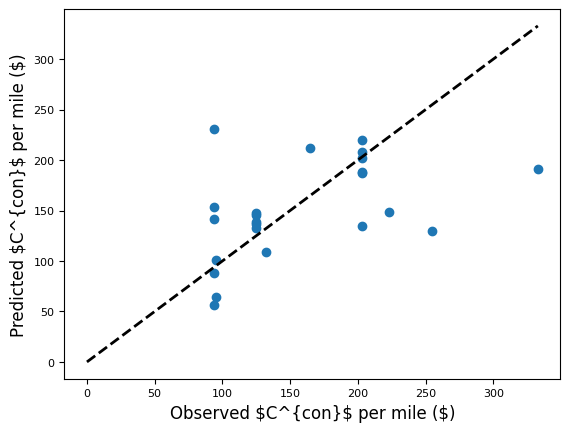

In [9]:
import matplotlib as mpl

y_test = df_concord_without_outliers_variable['total cost']
y_test=list(y_test)
y_pred=[]
for i in range(len(log_density)):
    y_pred.append(-61*(log_density[i])-64*(phase[i])+137*(log_clay[i]))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)
ax.set_xlabel(r'Observed $C^{con}$ per mile ($)', fontsize=12)
ax.set_ylabel(r'Predicted $C^{con}$ per mile ($)', fontsize=12)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
fig.savefig(r'../../figures/xy.png', dpi=400, bbox_inches='tight')
plt.show()

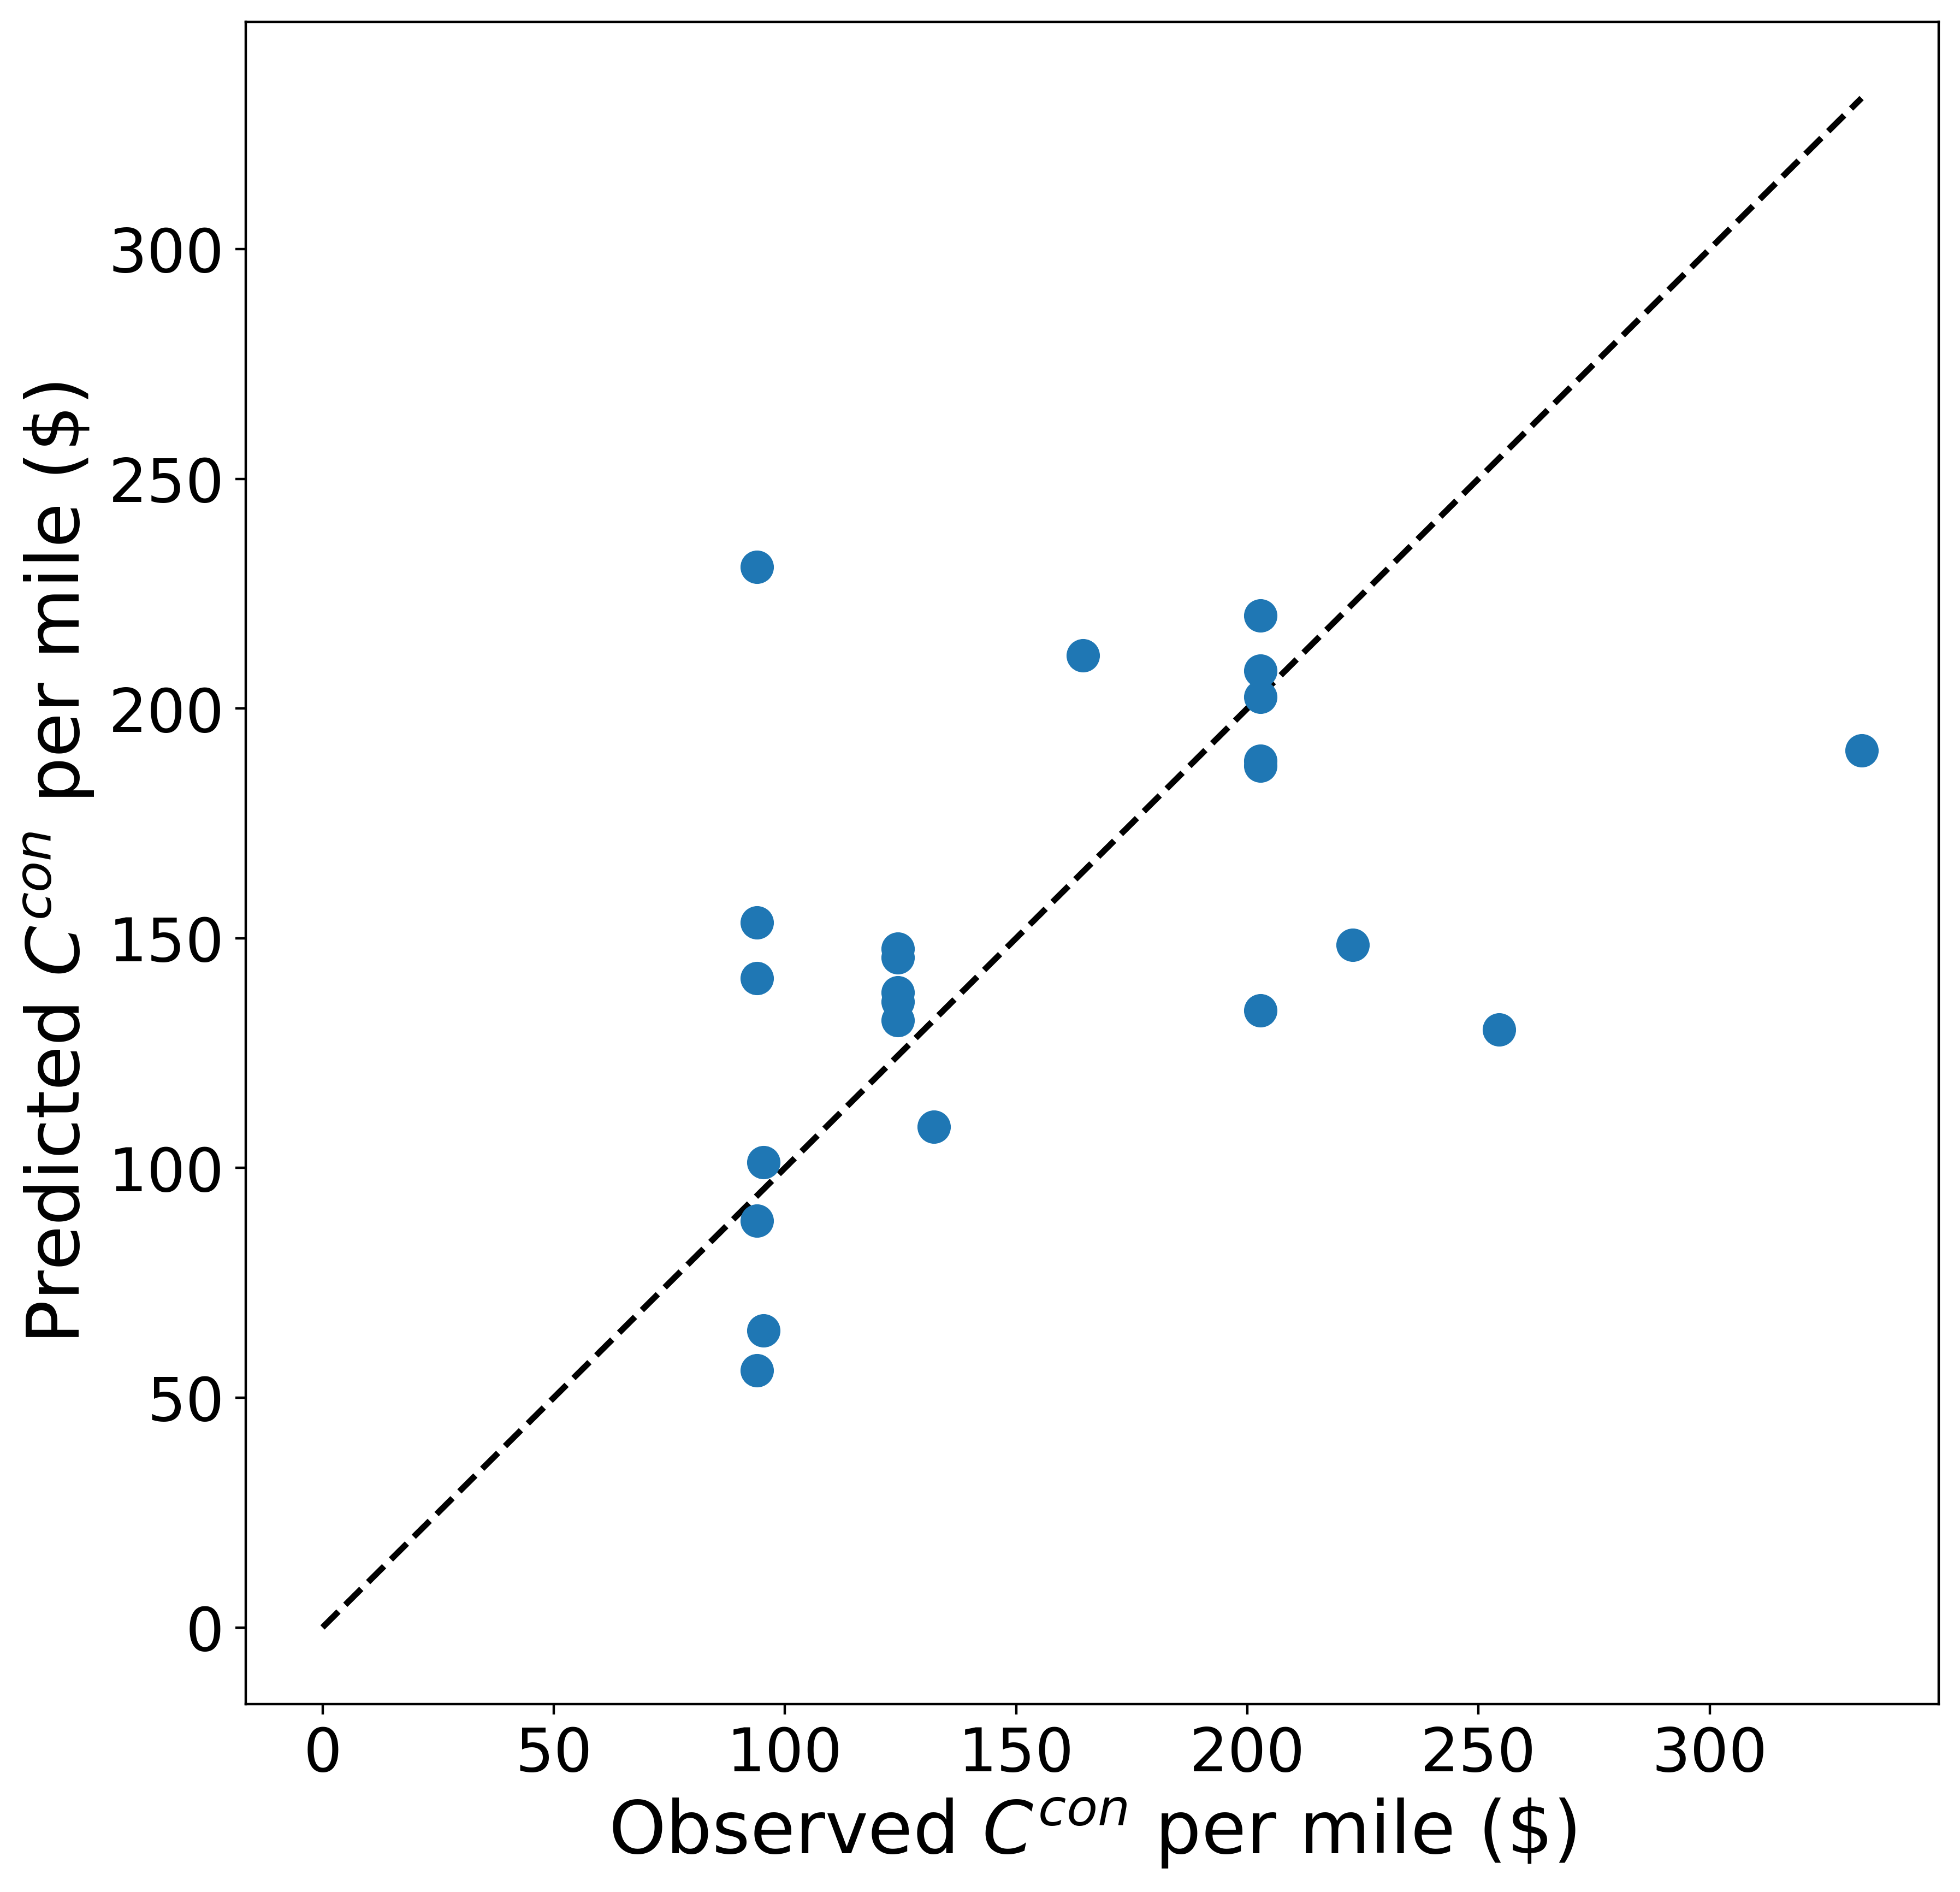

In [15]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=400)

ax.scatter(y_test, y_pred, s=100, zorder=3)
ax.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)
ax.set_xlabel(r'Observed $C^{con}$ per mile (\$)', fontsize=24)
ax.set_ylabel(r'Predicted $C^{con}$ per mile (\$)', fontsize=24)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
fig.savefig(r'../../figures/xy.png', dpi=400, bbox_inches='tight')
plt.show()


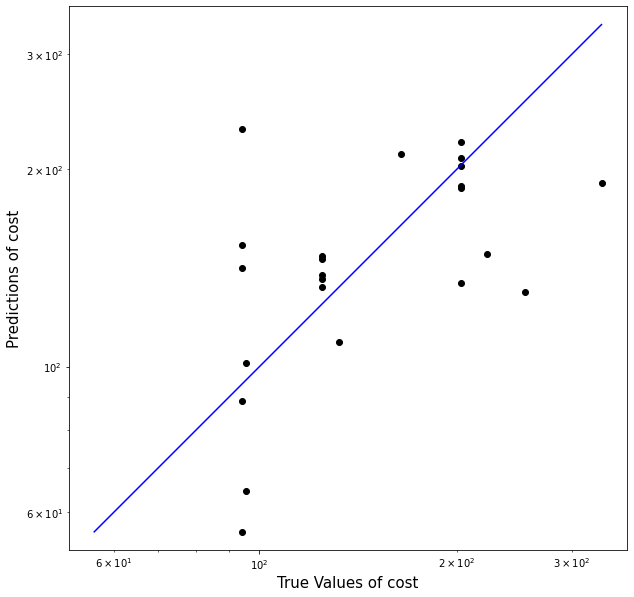

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='black')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values of cost', fontsize=15)
plt.ylabel('Predictions of cost', fontsize=15)
plt.axis('equal')
plt.show()

In [6]:
X= df_concord_variable[['residential_street_type','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              37.13
Date:                Mon, 07 Feb 2022   Prob (F-statistic):                    5.53e-09
Time:                        19:32:28   Log-Likelihood:                         -146.40
No. Observations:                  26   AIC:                                      298.8
Df Residuals:                      23   BIC:                                      302.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

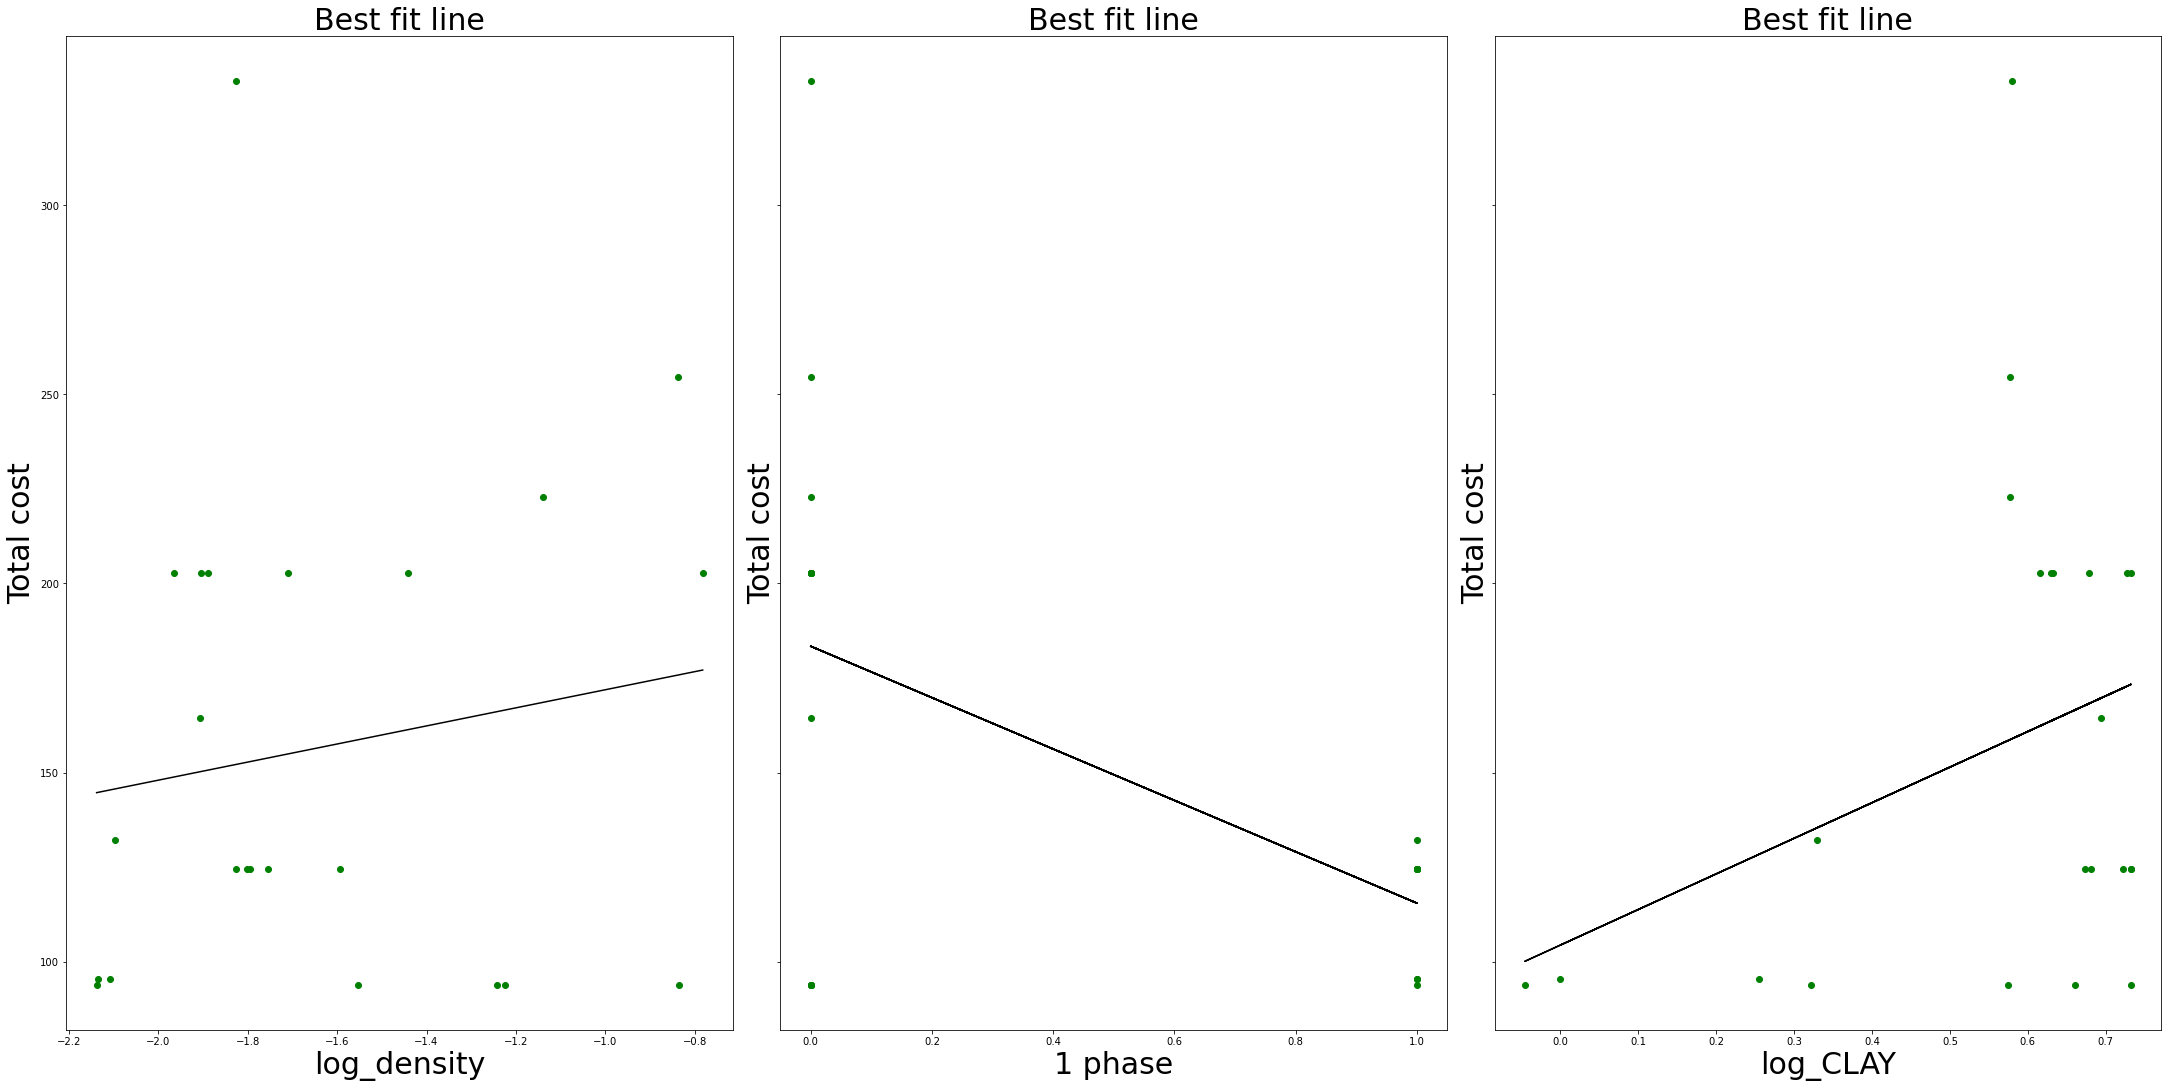

In [27]:
train_copy = df_concord_without_outliers_variable[['log_density','1 phase','log_CLAY']]
train_copy =pd.get_dummies(train_copy)
#train_copy=train_copy.fillna(0)
linear_regr_test = LinearRegression()

fig, axes = plt.subplots(1,len(train_copy.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(train_copy.columns):
  linear_regr_test.fit(train_copy[e].values[:,np.newaxis], y.values)
  axes[i].set_title("Best fit line", fontsize=30)
  axes[i].set_xlabel(str(e), fontsize=30)
  axes[i].set_ylabel('Total cost', fontsize=30)
  axes[i].scatter(train_copy[e].values[:,np.newaxis], y,color='g')
  axes[i].plot(train_copy[e].values[:,np.newaxis], 
  linear_regr_test.predict(train_copy[e].values[:,np.newaxis]),color='k')

In [28]:
df_concord_without_outliers_variable

,total cost,density(#parcel/ft),1 phase,SAND_mean,CLAY_mean,BLD_AREA/length,TOTAL_VAL/length,SAND_max,CLAY_max,log_density,SAND/CLAY,log_CLAY,distribution Rate Per Foot ($)
0,202.85,0.165165,0,66.652727,4.287273,669.675676,192356.156200,81.1,5.4,-0.782082,15.546650,0.632181,20.00
1,93.93,0.146512,0,61.063492,4.571429,569.027907,125247.441900,90.0,5.4,-0.834128,13.357639,0.660052,93.93
2,254.47,0.145607,0,59.912712,3.779661,677.595015,171725.370200,90.0,9.5,-0.836817,15.851345,0.577453,150.00
3,222.85,0.072660,0,59.912712,3.779661,338.129926,85693.497540,90.0,9.5,-1.138704,15.851345,0.577453,40.00
4,93.93,0.059649,0,54.424510,3.756863,257.683041,42973.801170,85.0,5.4,-1.224396,14.486691,0.574825,93.93
5,93.93,0.057143,1,45.400000,2.100000,235.985714,38852.142860,81.0,5.4,-1.243038,21.619048,0.322219,93.93
6,202.85,0.036217,0,59.446739,5.341304,119.619048,33540.375590,60.1,5.4,-1.441084,11.129630,0.727647,20.00
7,93.93,0.027907,0,10.016667,0.900000,1024.976744,110638.139500,60.1,5.4,-1.554287,11.129630,-0.045757,93.93
8,124.47,0.025541,1,58.793478,5.282609,99.029428,20494.225430,60.1,5.4,-1.592756,11.129630,0.722848,20.00
9,202.85,0.019508,0,67.883333,4.125000,22.223070,16011.026290,81.1,5.4,-1.709786,16.456566,0.615424,20.00


In [78]:
corr, _ = pearsonr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['log_density'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.159


In [72]:
corr, _ = pearsonr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['log_CLAY'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.333


In [79]:
corr, _ = pearsonr(df_concord_without_outliers_variable['total cost'], df_concord_without_outliers_variable['1 phase'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.527


In [52]:
corr, _ = pearsonr(df_concord_without_outliers_variable['1 phase'], df_concord_without_outliers_variable['log_density'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.357


In [56]:
corr, _ = pearsonr(df_concord_without_outliers_variable['log_CLAY'], df_concord_without_outliers_variable['log_density'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.122


In [57]:
corr, _ = pearsonr(df_concord_without_outliers_variable['log_CLAY'], df_concord_without_outliers_variable['1 phase'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.226


In [55]:
corr, _ = pearsonr(df_concord['log_density'], df_concord['residential_street_type'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.525


In [36]:
corr, _ = spearmanr(df_concord['log_density'], df_concord['residential_street_type'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.544


In [18]:
df_concord_without_outliers_variable['log_density*1 phase']=df_concord_without_outliers_variable['log_density']*df_concord_without_outliers_variable['1 phase']
X= df_concord_without_outliers_variable[['log_density','1 phase','log_CLAY','log_density*1 phase']]
y= df_concord_without_outliers_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2.236
Date:                Tue, 18 Jan 2022   Prob (F-statistic):              0.106
Time:                        16:37:33   Log-Likelihood:                -123.23
No. Observations:                  23   AIC:                             256.5
Df Residuals:                      18   BIC:                             262.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 139.0494    

In [22]:
X= df_concord[['log_density','1 phase','log_CLAY','residential_street_type']]
y= df_concord['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     2.508
Date:                Tue, 18 Jan 2022   Prob (F-statistic):             0.0728
Time:                        16:40:00   Log-Likelihood:                -138.90
No. Observations:                  26   AIC:                             287.8
Df Residuals:                      21   BIC:                             294.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [27]:
#def a function to implement single variable linear regression:
def estimate_coef(x1, y):
    # number of observations/points
    n = np.size(x1)
 
    # mean of x1 and y vector
    m_x1 = np.mean(x1)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x1
    SS_x1y = np.sum(y*x1) - n*m_y*m_x1
    SS_x1x1 = np.sum(x1*x1) - n*m_x1*m_x1
 
    # calculating regression coefficients
    b_1 = SS_x1y / SS_x1x1
    b_0 = m_y - b_1*m_x1
 
    return (b_0, b_1)
 
def plot_regression_line(x1, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x1, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x1
 
    # plotting the regression line
    plt.plot(x1, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x1')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def implement_single_variable_linear_regression(x1):
 
    # estimating coefficients
    b = estimate_coef(x1, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x1, y, b)
 
if __name__ == "__implement_single_variable_linear_regression__":
    implement_single_variable_linear_regression(x1)

Estimated coefficients:
b_0 = 156.28500977640965            
b_1 = -28.920821395920335


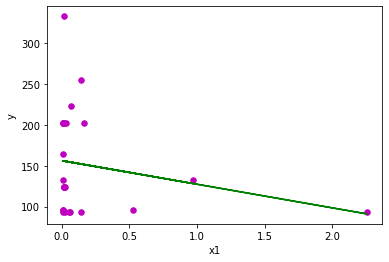

In [28]:
#implement single variable linear regression for density(#parcel/ft)
implement_single_variable_linear_regression(x1= df_concord_variable['density(#parcel/ft)'])

Estimated coefficients:
b_0 = 145.95860419328443            
b_1 = 0.0835126157902222


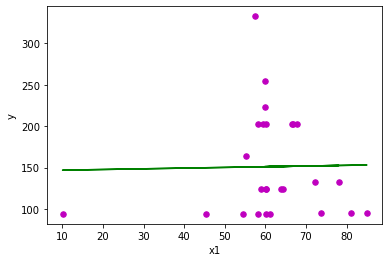

In [29]:
#implement single variable linear regression for SAND_mean
implement_single_variable_linear_regression(x1 = df_concord_variable['SAND_mean'])

Estimated coefficients:
b_0 = 177.426            
b_1 = -62.246909090909114


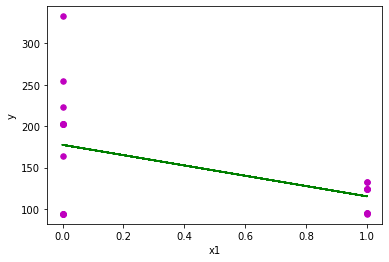

In [30]:
#implement single variable linear regression for 1 phase
implement_single_variable_linear_regression(x1 = df_concord_variable['1 phase'])

In [31]:
#def a function to implement multi variable linear regression:
def implement_multivariable_regression(X):
    #Splitting the dataset
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
    #Fitting the Multiple Linear Regression model
    mlr = LinearRegression()  
    mlr.fit(X, y)
    #Intercept and Coefficient
    print("Intercept: ", mlr.intercept_)
    print("Coefficients:", list(zip(X, mlr.coef_)))
    #Prediction of test set
    y_pred_mlr= mlr.predict(x_test)
    #Predicted values
    print("Prediction for test set: {}".format(y_pred_mlr))
    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
    #slr_diff.head()
    #Model Evaluation
    from sklearn import metrics
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
    print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)

In [32]:
#implement multi variable linear regression for density, 1 phase and SAND_mean
implement_multivariable_regression(X = df_concord_variable[['density(#parcel/ft)','1 phase', 'SAND_mean']])

Intercept:  113.49950728569426
Coefficients: [('density(#parcel/ft)', -34.830300841445876), ('1 phase', -76.98804934009596), ('SAND_mean', 1.2435156569310308)]
Prediction for test set: [ 90.97676587 185.33662126 137.15533812 187.981487   110.68797404
 190.63046484 197.2340236  185.47112943]
R squared: 37.13
Mean Absolute Error: 28.157480760857627
Mean Square Error: 1583.9719904117899
Root Mean Square Error: 39.79914559901745


In [33]:
#implement multi variable linear regression for density, 1 phase and CLAY_mean
implement_multivariable_regression(X = df_concord_variable[['density(#parcel/ft)','1 phase', 'CLAY_mean']])

Intercept:  156.54476173372706
Coefficients: [('density(#parcel/ft)', -32.75614949803049), ('1 phase', -59.05309473324798), ('CLAY_mean', 6.4499823403555965)]
Prediction for test set: [109.16484995 186.88321924 108.8618391  191.13643984 131.79607191
 178.78742027 182.51193002 178.54344348]
R squared: 32.83
Mean Absolute Error: 29.736648472125122
Mean Square Error: 1640.8087219691015
Root Mean Square Error: 40.50689721478432


In [34]:
#implement multi variable linear regression for BLD_AREA/length, 1 phase and SAND_mean
implement_multivariable_regression(X = df_concord_variable[['BLD_AREA/length','1 phase', 'SAND_mean']])

Intercept:  116.69400552544124
Coefficients: [('BLD_AREA/length', -0.006617028957576138), ('1 phase', -74.9467943849727), ('SAND_mean', 1.1711729903342547)]
Prediction for test set: [ 93.3569406  184.23803804 136.32627482 186.17244278 111.61203334
 190.3246161  196.05008132 184.62473992]
R squared: 35.73
Mean Absolute Error: 27.844033535583407
Mean Square Error: 1544.8956587600883
Root Mean Square Error: 39.305160714085474


In [35]:
#implement multi variable linear regression for BLD_AREA/length, 1 phase and CLAY_mean
implement_multivariable_regression(X = df_concord_variable[['BLD_AREA/length','1 phase', 'CLAY_mean']])

Intercept:  157.8193637047039
Coefficients: [('BLD_AREA/length', -0.006401223022299533), ('1 phase', -58.204263101528966), ('CLAY_mean', 5.982929062294761)]
Prediction for test set: [110.66865445 185.83340567 109.94913349 189.24776898 131.41728938
 179.18306895 182.35669126 178.26836238]
R squared: 31.83
Mean Absolute Error: 29.91266475531505
Mean Square Error: 1610.312136621202
Root Mean Square Error: 40.12869467876076


In [36]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'CLAY_mean']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total cost   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.584
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0301
Time:                        10:05:14   Log-Likelihood:                -138.81
No. Observations:                  26   AIC:                             285.6
Df Residuals:                      22   BIC:                             290.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 156.5448     37.937      4.126      0.000      77.869     235.221
density(#parcel/ft)   -32.7561     23.271     -1.408      0.173     -81.018      15.506
1 phase               -59.0531     22.603     -2.613      0.016    -105.929     -12.178
CLAY_mean               6.4500      8.224      0.784      0.441     -10.606      23.506
==============================================================================
Omnibus:                        5.852   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                4.643
Skew:                           0.512   Prob(JB):                       0.0981
Kurtosis:                       4.800   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'CLAY_mean']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              37.62
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    4.89e-09
Time:                        10:05:15   Log-Likelihood:                         -146.26
No. Observations:                  26   AIC:                                      298.5
Df Residuals:                      23   BIC:                                      302.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [4]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'log_CLAY']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4.046
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0197
Time:                        15:06:43   Log-Likelihood:                -138.27
No. Observations:                  26   AIC:                             284.5
Df Residuals:                      22   BIC:                             289.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 145.4689    

In [39]:
X=df_concord_variable[['BLD_AREA/length','1 phase', 'SAND_mean']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              59.98
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    4.99e-11
Time:                        10:05:16   Log-Likelihood:                         -141.04
No. Observations:                  26   AIC:                                      288.1
Df Residuals:                      23   BIC:                                      291.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [40]:
X=df_concord_variable[['BLD_AREA/length','1 phase', 'CLAY_mean']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.829
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              37.10
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    5.57e-09
Time:                        10:05:16   Log-Likelihood:                         -146.41
No. Observations:                  26   AIC:                                      298.8
Df Residuals:                      23   BIC:                                      302.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [41]:
X=df_concord_variable[['density(#parcel/ft)','1 phase', 'SAND_max']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     3.861
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0233
Time:                        10:05:16   Log-Likelihood:                -138.48
No. Observations:                  26   AIC:                             285.0
Df Residuals:                      22   BIC:                             290.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 106.9303    

In [42]:
X=df_concord_variable[['density(#parcel/ft)','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              37.98
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    4.47e-09
Time:                        10:05:17   Log-Likelihood:                         -146.16
No. Observations:                  26   AIC:                                      298.3
Df Residuals:                      23   BIC:                                      302.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [43]:
X=df_concord_variable[['density(#parcel/ft)','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4.046
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0197
Time:                        10:05:17   Log-Likelihood:                -138.27
No. Observations:                  26   AIC:                             284.5
Df Residuals:                      22   BIC:                             289.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 145.4689    

In [44]:
X=df_concord_variable[['log_density','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              51.12
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    2.48e-10
Time:                        10:05:18   Log-Likelihood:                         -142.87
No. Observations:                  26   AIC:                                      291.7
Df Residuals:                      23   BIC:                                      295.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [45]:
X=df_concord_variable[['log_density','1 phase','log_CLAY']]
y=df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.449
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0341
Time:                        10:05:21   Log-Likelihood:                -138.97
No. Observations:                  26   AIC:                             285.9
Df Residuals:                      22   BIC:                             291.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         117.5917     42.392      2.774      

In [47]:
X= df_concord_without_outliers_variable[['log_density','1 phase','SAND_max']]
y= df_concord_without_outliers_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              62.74
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    2.36e-10
Time:                        10:05:24   Log-Likelihood:                         -123.67
No. Observations:                  23   AIC:                                      253.3
Df Residuals:                      20   BIC:                                      256.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [49]:
X= df_concord_variable[['UNITS_density','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
sklearn.feature_selection.r_regression(X, y, center=True)

array([-0.14179224, -0.50018074,  0.32216246])

In [28]:
X= df_concord_variable[['UNITS_density','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              38.41
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                    4.01e-09
Time:                        10:48:15   Log-Likelihood:                         -146.04
No. Observations:                  26   AIC:                                      298.1
Df Residuals:                      23   BIC:                                      301.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [50]:
X= df_concord_variable[['UNITS_density','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     4.225
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0167
Time:                        10:15:44   Log-Likelihood:                -138.07
No. Observations:                  26   AIC:                             284.1
Df Residuals:                      22   BIC:                             289.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           145.2198     33.659      4.314

In [51]:
X= df_concord_variable[['residential_mode','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
sklearn.feature_selection.r_regression(X, y, center=True)

array([ 0.26837867, -0.50018074,  0.32216246])

In [6]:
X= df_concord_variable[['residential_mode','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              50.27
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    2.93e-10
Time:                        09:27:04   Log-Likelihood:                         -143.06
No. Observations:                  26   AIC:                                      292.1
Df Residuals:                      23   BIC:                                      295.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [52]:
X= df_concord_variable[['residential_mode','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     3.383
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0363
Time:                        10:23:45   Log-Likelihood:                -139.05
No. Observations:                  26   AIC:                             286.1
Df Residuals:                      22   BIC:                             291.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              119.5053     42.399  

In [53]:
X= df_concord_variable[['residential_100%','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
sklearn.feature_selection.r_regression(X, y, center=True)

array([-0.25483392, -0.50018074,  0.32216246])

In [8]:
X= df_concord_variable[['residential_100%','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              36.48
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                    6.53e-09
Time:                        09:28:29   Log-Likelihood:                         -146.59
No. Observations:                  26   AIC:                                      299.2
Df Residuals:                      23   BIC:                                      303.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [9]:
X= df_concord_variable[['residential_100%','1 phase','log_CLAY']]
y= df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.004
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0523
Time:                        09:28:41   Log-Likelihood:                -139.52
No. Observations:                  26   AIC:                             287.0
Df Residuals:                      22   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              141.7154     35.533  

In [12]:
X= df_concord_variable[['residential_100%','1 phase','log_CLAY']]
y= df_concord_variable['distribution Rate Per Foot ($)']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                       OLS Regression Results                                      
Dep. Variable:     distribution Rate Per Foot ($)   R-squared (uncentered):                   0.533
Model:                                        OLS   Adj. R-squared (uncentered):              0.472
Method:                             Least Squares   F-statistic:                              8.747
Date:                            Wed, 05 Jan 2022   Prob (F-statistic):                    0.000471
Time:                                    09:31:26   Log-Likelihood:                         -136.12
No. Observations:                              26   AIC:                                      278.2
Df Residuals:                                  23   BIC:                                      282.0
Df Model:                                       3                                                  
Covariance Type:                        nonrobust                                                  


In [31]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_density','1 phase','log_CLAY','log_density*1phase']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              42.03
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                    5.34e-10
Time:                        21:34:22   Log-Likelihood:                         -141.31
No. Observations:                  26   AIC:                                      290.6
Df Residuals:                      22   BIC:                                      295.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [32]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_density','1 phase','log_CLAY','log_density*1phase']]
y= df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     2.682
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0597
Time:                        21:35:04   Log-Likelihood:                -138.62
No. Observations:                  26   AIC:                             287.2
Df Residuals:                      21   BIC:                             293.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                103.1022     46

In [33]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_CLAY','log_density*1phase']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              56.76
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                    7.98e-10
Time:                        21:35:43   Log-Likelihood:                         -146.65
No. Observations:                  26   AIC:                                      297.3
Df Residuals:                      24   BIC:                                      299.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [34]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_CLAY','log_density*1phase']]
y= df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     3.431
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0497
Time:                        21:36:11   Log-Likelihood:                -140.59
No. Observations:                  26   AIC:                             287.2
Df Residuals:                      23   BIC:                             290.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                131.5482     35

In [35]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_CLAY','1 phase','log_density*1phase']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              36.67
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                    6.22e-09
Time:                        21:36:41   Log-Likelihood:                         -146.53
No. Observations:                  26   AIC:                                      299.1
Df Residuals:                      23   BIC:                                      302.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [36]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_CLAY','1 phase','log_density*1phase']]
y= df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.997
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0526
Time:                        21:37:02   Log-Likelihood:                -139.53
No. Observations:                  26   AIC:                             287.1
Df Residuals:                      22   BIC:                             292.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                141.2387     35

In [37]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_CLAY','log_density','log_density*1phase']]
y= df_concord_variable['total cost']
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             total cost   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              56.82
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                    8.62e-11
Time:                        21:37:21   Log-Likelihood:                         -141.67
No. Observations:                  26   AIC:                                      289.3
Df Residuals:                      23   BIC:                                      293.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [38]:
df_concord_variable['log_density*1phase']=df_concord_variable['log_density']*df_concord_variable['1 phase']
X= df_concord_variable[['log_CLAY','log_density','log_density*1phase']]
y= df_concord_variable['total cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             total cost   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     3.664
Date:                Tue, 08 Feb 2022   Prob (F-statistic):             0.0279
Time:                        21:38:08   Log-Likelihood:                -138.71
No. Observations:                  26   AIC:                             285.4
Df Residuals:                      22   BIC:                             290.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 93.6978     39